In [ ]:
import cv2 as cv
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
anjing_a = cv.imread('./Jenis_Anjing/Doberman/doberman1.jpg')

In [ ]:
anjing_a = "./Jenis_Anjing/Dachshund"
anjing_b = "./Jenis_Anjing/Doberman"

In [ ]:
import os
def ambil_data(folder):
    anjing = []
    dir_list = os.listdir(folder)
    for i in dir_list:
        data = cv.imread(folder + '/' + i)
        data = cv.resize(data, (300, 300))
        data = data/255
        anjing.append(data)
    return anjing

In [ ]:
data_anjing_a = ambil_data(anjing_a)

In [ ]:
data_anjing_b = ambil_data(anjing_b)

In [ ]:
import torch
import torch.nn as nn
class TrajectoriesData(torch.utils.data.Dataset):
    def __init__(self, data):
        to1hot = np.eye(2)
        self.dataset = []
        for d, label in data:
            print(d, label)
            self.dataset += [
                (im, to1hot[label]) for im in d
            ]
        print(len(self.dataset))
    def __len__(self):
            return len(self.dataset)

    def __getitem__(self, index:int) -> (np.ndarray, int):
            vec, label = self.dataset[index]
            return torch.tensor(vec, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)

In [ ]:
train_data = torch.utils.data.DataLoader(TrajectoriesData([
    (data_anjing_a[:16], 0),
    ((data_anjing_b[:16], 1))]), batch_size=8, shuffle=True)
test_data = torch.utils.data.DataLoader(TrajectoriesData([
    ((data_anjing_a[16:], 0)),
    ((data_anjing_b[16:], 1))]), batch_size=8, shuffle=True)

[array([[[0.67058824, 0.87843137, 0.82352941],
        [0.63137255, 0.84705882, 0.78823529],
        [0.64705882, 0.87058824, 0.81176471],
        ...,
        [0.36470588, 0.3254902 , 0.45882353],
        [0.37254902, 0.3254902 , 0.46666667],
        [0.44705882, 0.39215686, 0.53333333]],

       [[0.65098039, 0.87843137, 0.81960784],
        [0.64705882, 0.87843137, 0.81960784],
        [0.63137255, 0.8745098 , 0.81176471],
        ...,
        [0.35686275, 0.30196078, 0.43529412],
        [0.38039216, 0.3254902 , 0.46666667],
        [0.45098039, 0.38039216, 0.54117647]],

       [[0.63137255, 0.87843137, 0.81568627],
        [0.61176471, 0.85882353, 0.79607843],
        [0.63137255, 0.87843137, 0.81568627],
        ...,
        [0.41568627, 0.36078431, 0.49411765],
        [0.36862745, 0.29803922, 0.45098039],
        [0.43137255, 0.35294118, 0.52156863]],

       ...,

       [[0.56078431, 0.76862745, 0.76862745],
        [0.50588235, 0.78431373, 0.8       ],
        [0.43529412, 

In [ ]:
for i in range(2):
    iterlist = iter(train_data)
    print(next(iterlist))

[tensor([[[[0.2471, 0.7686, 0.5451],
          [0.1020, 0.6235, 0.3961],
          [0.1176, 0.6549, 0.4353],
          ...,
          [0.0706, 0.5725, 0.3412],
          [0.1725, 0.6706, 0.4392],
          [0.0784, 0.5686, 0.3412]],

         [[0.1843, 0.7059, 0.4824],
          [0.0549, 0.5882, 0.3608],
          [0.0392, 0.5725, 0.3490],
          ...,
          [0.0588, 0.5569, 0.3333],
          [0.1647, 0.6588, 0.4353],
          [0.1137, 0.6039, 0.3804]],

         [[0.2078, 0.7294, 0.5059],
          [0.1412, 0.6784, 0.4510],
          [0.0549, 0.5765, 0.3529],
          ...,
          [0.0588, 0.5451, 0.3294],
          [0.2235, 0.7059, 0.4941],
          [0.1922, 0.6706, 0.4588]],

         ...,

         [[0.0353, 0.5373, 0.3294],
          [0.2275, 0.7529, 0.5451],
          [0.0392, 0.5647, 0.3569],
          ...,
          [0.2588, 0.7059, 0.5490],
          [0.0980, 0.5294, 0.3765],
          [0.3333, 0.7451, 0.6039]],

         [[0.1490, 0.6549, 0.4510],
          [0.274

In [ ]:
class cnn(nn.Module):
    def __init__(self, hidden_dim = 100, n_output=2):
        super(cnn, self).__init__()
        self.convolution1 = nn.Conv2d(3,2,3)
        self.convolution2 = nn.Conv2d(2,1,3)
        self.convolution3 = nn.Conv2d(1,1,3)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2,2)

    def forward(self, x):
        x = torch.permute(x, (0, 3, 1, 2))
        print('x shape = ', x.shape)
        x = self.convolution1(x)
        print('x shape = ', x.shape)
        x = self.relu(x)
        x = self.maxpool(x)
        print('x shape = ', x.shape)




In [ ]:
class cnn(nn.Module):
    def __init__(self, hidden_dim = 100, n_output=2):
        super(cnn, self).__init__()
        self.convolution = nn.Sequential(
                nn.Conv2d(3, 2, 3),
                nn.ReLU(),
                nn.MaxPool2d(2,2),

                nn.Conv2d(2, 1, 3),
                nn.ReLU(),
                nn.MaxPool2d(2,2),

                nn.Conv2d(1, 1, 3),
                nn.ReLU(),
                nn.MaxPool2d(2,2),

                nn.Conv2d(1, 1, 3),
                nn.ReLU(),
                nn.MaxPool2d(2,2),
            )
        self.linear = nn.Sequential(
                nn.Linear(256, hidden_dim),
                nn.ReLU(),
#                 nn.Linear(hidden_dim, hidden_dim),
#                 nn.ReLU(),
                nn.Linear(hidden_dim, n_output),
            )
    def forward(self, x):
        x = torch.permute(x, (0, 3, 1, 2))
        x = self.convolution(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return x

In [ ]:
import torch.optim as optim
hidden_dim = 32
n_output = 2
model = cnn(hidden_dim=hidden_dim, n_output=n_output)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
import matplotlib.pyplot as plt

EPOCH = 100
device = 'cpu'
loss_all = []
for epoch in range(EPOCH):
    loss_total = 0
    for batch, (src, trg) in enumerate(train_data):
#         print(src.shape)
#         print(trg.shape)

        pred = model(src).to(device)

        loss = criterion(pred, trg.to(device))
        loss_total+=loss
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_batch = loss_total.detach().numpy()/len(train_data)
    loss_all.append(loss_batch)
    print("epoch = ", epoch + 1, "loss = ", loss_batch)

epoch =  1 loss =  0.695894718170166
epoch =  2 loss =  0.6955063343048096
epoch =  3 loss =  0.6956879496574402
epoch =  4 loss =  0.6955889463424683
epoch =  5 loss =  0.6953063607215881
epoch =  6 loss =  0.6951242685317993
epoch =  7 loss =  0.695513129234314
epoch =  8 loss =  0.6948655843734741
epoch =  9 loss =  0.6946955919265747
epoch =  10 loss =  0.69508957862854
epoch =  11 loss =  0.6950206756591797
epoch =  12 loss =  0.6951481103897095
epoch =  13 loss =  0.6947081089019775
epoch =  14 loss =  0.6945540904998779
epoch =  15 loss =  0.694401741027832
epoch =  16 loss =  0.6943471431732178
epoch =  17 loss =  0.6943902969360352
epoch =  18 loss =  0.6942447423934937
epoch =  19 loss =  0.6949523687362671
epoch =  20 loss =  0.6943438053131104
epoch =  21 loss =  0.6941103339195251
epoch =  22 loss =  0.6943534016609192
epoch =  23 loss =  0.6944055557250977
epoch =  24 loss =  0.6941812038421631
epoch =  25 loss =  0.6939563155174255
epoch =  26 loss =  0.6939234733581543


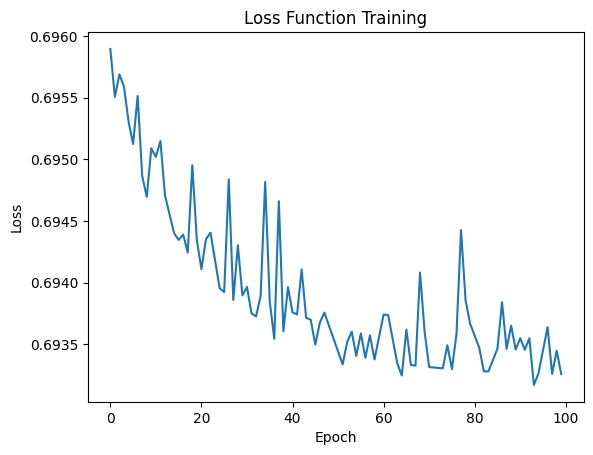

In [ ]:
plt.plot(loss_all)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function Training')
plt.show()

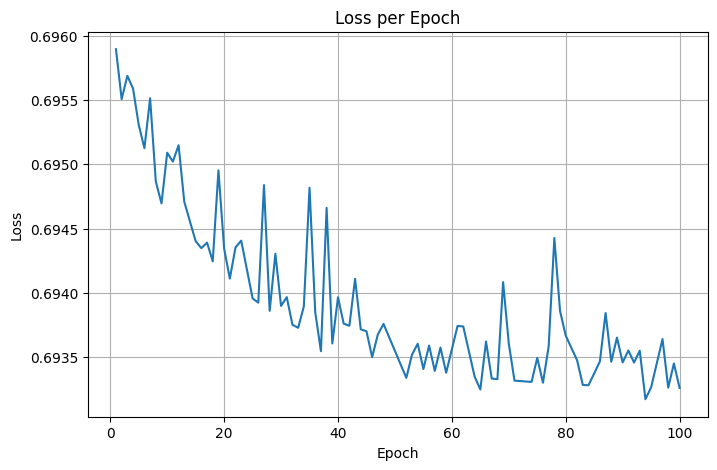

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_all) + 1), loss_all)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
loss_test = []

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for batch, (src, trg) in enumerate(test_data):
        pred = model(src).to(device)

        loss = criterion(pred, trg.to(device))

        print("pred = ", pred[0], "target = ", trg[0])
        print("loss = ", loss.item())

        loss_test.append(loss.item())

# Calculate the average test loss
avg_test_loss = sum(loss_test) / len(loss_test)
print("Average Test Loss:", avg_test_loss)

pred =  tensor([-0.0176, -0.0056]) target =  tensor([1., 0.])
loss =  0.6946638226509094
pred =  tensor([-0.0176, -0.0056]) target =  tensor([0., 1.])
loss =  0.6911670565605164
Average Test Loss: 0.6929154396057129


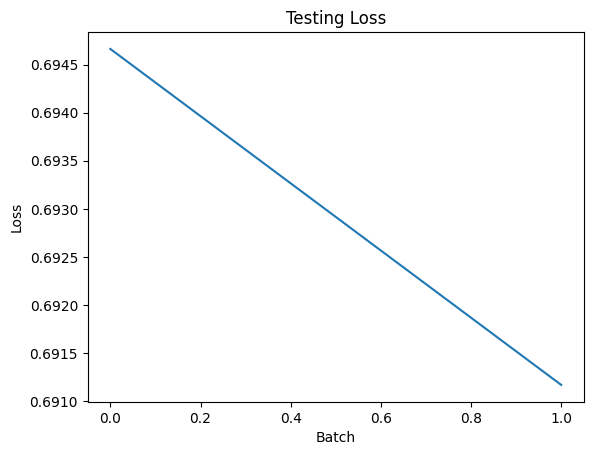

In [ ]:
plt.plot(loss_test)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Testing Loss')
plt.show()